#### Basic handling of molecules (i.e. reading of molecules, calculation of similarity)
More information can be here:
http://www.rdkit.org/docs/index.html and http://www.rdkit.org/docs/api/index.html

In [1]:
# The majority of the basic molecular functionality is found in module rdkit.Chem
from rdkit import Chem
from rdkit.Chem import AllChem

In [2]:
# Individual molecules can be constructed using a variety of approaches, like SMILES
# FDA approved EGFR inhibitors: Gefitinib, Erlotinib
gefitinib = Chem.MolFromSmiles("COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1")
erlotinib = Chem.MolFromSmiles("C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1")

#### Drawing molecules

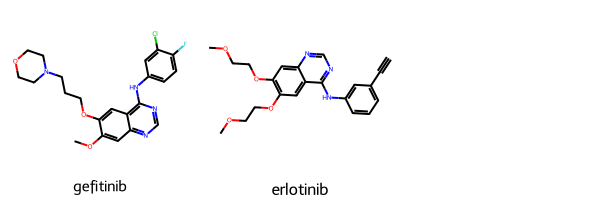

In [3]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
Draw.MolsToGridImage([gefitinib, erlotinib], legends=["gefitinib", "erlotinib"])

### Processing
#### Step 1: Protonation -  by default RDKit molecules do not have H atoms

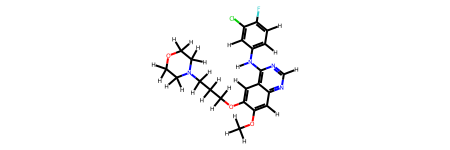

In [4]:
gefitinib_h = Chem.AddHs(gefitinib)
gefitinib_h

In [5]:
print(Chem.MolToMolBlock(gefitinib_h))


     RDKit          2D

 55 58  0  0  0  0  0  0  0  0999 V2000
    0.7500   -6.4952    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000   -5.1962    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -3.8971    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000   -2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7500    3.8971    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.2500    3.8971    0

#### Step 2: Generation of 3D conformation

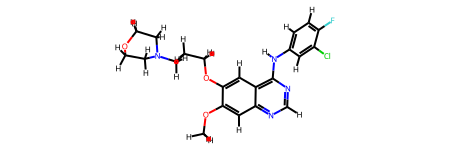

In [6]:
AllChem.EmbedMolecule(gefitinib_h)
AllChem.UFFOptimizeMolecule(gefitinib_h)  # improves the quality of the conformation
gefitinib_h

In [7]:
print(Chem.MolToMolBlock(gefitinib_h))


     RDKit          3D

 55 58  0  0  0  0  0  0  0  0999 V2000
   -1.2869   -4.9262    0.7673 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1144   -3.5141    0.7073 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.1260   -2.8597    0.7754 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.3355   -3.5652    0.9116 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5515   -2.8803    0.9776 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7111   -3.5779    1.0902 N   0  0  0  0  0  0  0  0  0  0  0  0
    4.9070   -2.9419    1.1499 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.9603   -1.5871    1.1067 N   0  0  0  0  0  0  0  0  0  0  0  0
    3.8350   -0.8298    0.9920 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.9493    0.6038    1.0067 N   0  0  0  0  0  0  0  0  0  0  0  0
    5.0767    1.3126    0.4633 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.4124    2.5748    0.9774 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.4920    3.2895    0.4507 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.2394    2.7571   -0

#### Step 3: Writing molecule to file 

In [8]:
sd_writer = Chem.SDWriter("../data/test_mol_3D.sdf")
sd_writer.write(gefitinib_h)
sd_writer.close()  # always close opened files

#### Notes: Sometimes hydrogen are not required and could be removed again 

In [9]:
gefitinib_no_h = Chem.RemoveHs(gefitinib_h)
print(Chem.MolToMolBlock(gefitinib_no_h))


     RDKit          3D

 31 34  0  0  0  0  0  0  0  0999 V2000
   -1.2869   -4.9262    0.7673 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1144   -3.5141    0.7073 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.1260   -2.8597    0.7754 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.3355   -3.5652    0.9116 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5515   -2.8803    0.9776 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7111   -3.5779    1.0902 N   0  0  0  0  0  0  0  0  0  0  0  0
    4.9070   -2.9419    1.1499 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.9603   -1.5871    1.1067 N   0  0  0  0  0  0  0  0  0  0  0  0
    3.8350   -0.8298    0.9920 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.9493    0.6038    1.0067 N   0  0  0  0  0  0  0  0  0  0  0  0
    5.0767    1.3126    0.4633 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.4124    2.5748    0.9774 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.4920    3.2895    0.4507 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.2394    2.7571   -0